<a href="https://colab.research.google.com/github/dianelnursa/PEMROGRAMAN_JARINGAN/blob/main/Socket%20UDP-CLIENTSERVER/Dian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**VIDEO PENJELASAN : https://youtu.be/1RWX338A-c8**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as plting
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv("/content/drive/MyDrive/show.csv")
df

,age,experience,rank,nationality,go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES
5,44,14,5,UK,NO
6,66,3,7,N,YES
7,35,14,9,UK,YES
8,52,13,7,N,YES
9,35,5,9,N,YES


In [ ]:
d = {'UK':0, 'USA':1, 'N':2}
df['nationality']= df['nationality'].map(d)
d ={'YES':1, 'NO':0}
df['go'] = df['go'].map(d)
df

,age,experience,rank,nationality,go
0,36,10,9,0,0
1,42,12,4,1,0
2,23,4,6,2,0
3,52,4,4,1,0
4,43,21,8,1,1
5,44,14,5,0,0
6,66,3,7,2,1
7,35,14,9,0,1
8,52,13,7,2,1
9,35,5,9,2,1


             age  experience  rank  go
nationality                           
0            178          50    39   3
1            161          40    21   1
2            176          25    29   3


<BarContainer object of 3 artists>

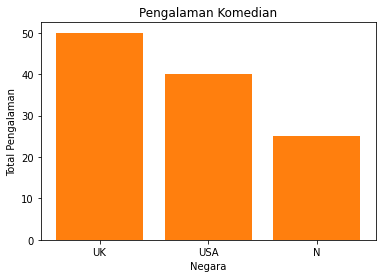

In [ ]:
negara=df.groupby(['nationality']).sum()
print(negara)
nationality = ('UK','USA', 'N')
jml_experience=(50,40,25)
plt.bar(nationality, jml_experience)

plt.title('Pengalaman Komedian')
plt.xlabel('Negara')
plt.ylabel('Total Pengalaman')
plt.bar(nationality,jml_experience)

In [ ]:
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          13 non-null     int64
 1   experience   13 non-null     int64
 2   rank         13 non-null     int64
 3   nationality  13 non-null     int64
 4   go           13 non-null     int64
dtypes: int64(5)
memory usage: 648.0 bytes


In [ ]:
X = df.iloc[:,0:4]
y = df.iloc[:,4]

bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns= pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns =['Sprecs', 'Score']
print(featureScores.nlargest(5,'Score'))

        Sprecs     Score
2         rank  2.949438
0          age  2.177023
1   experience  1.292133
3  nationality  0.097222


In [ ]:
features =['age', 'experience', 'rank', 'nationality']
X = df[features]
y = df['go']


print(X)
print(y)

    age  experience  rank  nationality
0    36          10     9            0
1    42          12     4            1
2    23           4     6            2
3    52           4     4            1
4    43          21     8            1
5    44          14     5            0
6    66           3     7            2
7    35          14     9            0
8    52          13     7            2
9    35           5     9            2
10   24           3     5            1
11   18           3     7            0
12   45           9     9            0
0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
Name: go, dtype: int64


<function matplotlib.pyplot.show>

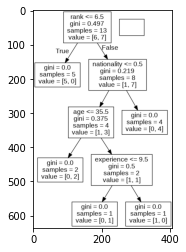

In [ ]:
import pydotplus
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X,y)
data = tree.export_graphviz(dtree, out_file=None, feature_names = features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('komedian.png')

img = plting.imread('komedian.png')
imgplot = plt.imshow(img)
plt.show

In [ ]:
print(dtree.predict([[40, 10, 7, 1]]))

[1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
